In [7]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from pandas.compat import StringIO
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
sklearn.__version__

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

In [8]:
#CSVファイルからDataFrameへロード
df = pd.read_csv('predict_stock.csv')
df.head(6)

,date,outcome,difference_ave5days,movement_yesterday,movement_daybefore,nydow
0,2015/1/13,0,-0.00896,-0.00704,-0.01319,-0.00952
1,2015/1/14,0,-0.00537,0.00684,-0.00737,-0.00697
2,2015/1/15,1,-0.00896,-0.00987,0.00458,-0.01059
3,2015/1/16,0,-0.01323,0.01378,-0.01729,-0.00610
4,2015/1/19,1,0.00078,0.00304,0.00810,0.01102
5,2015/1/20,1,0.00873,0.00079,0.00337,0.01102


In [9]:
#説明変数・目的変数抽出・データ分割
train_X = df[['difference_ave5days','movement_yesterday','movement_daybefore','nydow']].values
train_y = df.outcome
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

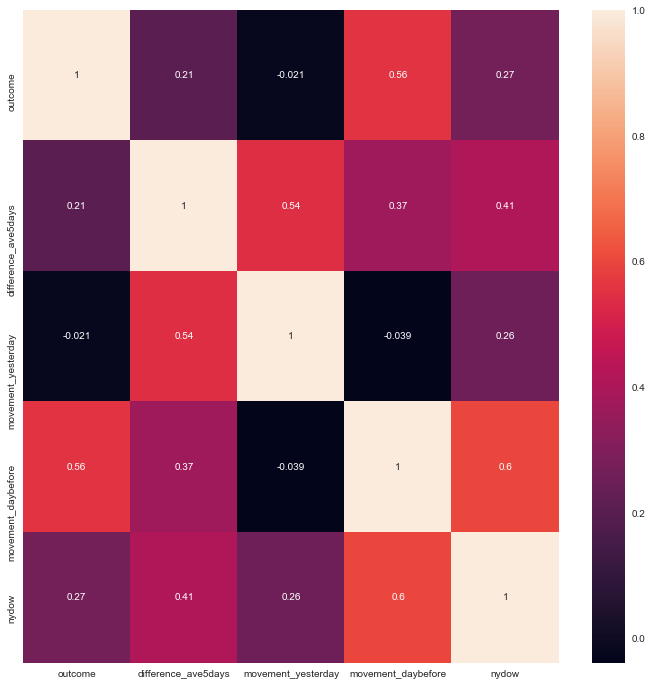

In [10]:
#各列の相関係数を求める
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot =True)

In [11]:
#決定木の実行
clf = DecisionTreeClassifier(random_state=5)
clf = clf.fit(train_X,train_y)
pred = clf.predict(test_X)

In [12]:
#決定木の正解率
pred = clf.predict(test_X)
fpr,tpr,thresholds = roc_curve(test_y,pred,pos_label = 1)
auc(fpr,tpr)
accuracy_score(pred,test_y)

0.6441947565543071

In [13]:
#可視化
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [21]:
#ランダムフォレストの実行
clf1 =RandomForestClassifier(max_depth=11,random_state = 2)
clf1 = clf1.fit(train_X , train_y)
pred1 = clf1.predict(test_X)
fpr1,tpr1,threshholds1 = roc_curve(test_y , pred, pos_label=1)
auc(fpr1,tpr1)
accuracy_score(pred1,test_y)

0.7116104868913857

In [14]:
    X = list(depths)
    plt.plot(X, accuracy_scores)

    plt.xlabel('max depth')
    plt.ylabel('accuracy rate')
    plt.show()

NameError: name 'depths' is not defined